<a href="https://colab.research.google.com/github/dhdbsrlw/MLVU/blob/main/hw1_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
"""
Change directory to where this file is located
"""
# 'COPY&PASTE FILE DIRECTORY HERE'

%cd /content/drive/MyDrive/AI/VIP Lab/Homework 1

/content/drive/MyDrive/AI/VIP Lab/Homework 1


## Import Modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mnist.data_utils import load_data

In [5]:
# 데이터셋 로드 테스트
X_train, y_train, X_test, y_test = load_data()

MNIST data loaded:
Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Test data shape: (10000, 784)
Test labels shape: (10000, 10)


## K-Nearest Neighbor Implementation

In [52]:
class KNN:
    """ k-nearest neighbor classifier class """

    # 문제 (a)
    def train(self, X, y):
        """
        Trains the classifier using the given training data (X, y).

        Question (a)
        - Recall that for k-nearest neighbors this is just memorizing the training data.

        Inputs
        - X: A numpy array of shape (N, D), where N is the number of data points,
            D is the dimensionality of each data point.
        - y: A numpy array of shape (N,) containing the training labels, where
            y[i] is the label for X[i]. With C classes, each y[i] is an integer
            from 0 to C-1.
        """
        self.X = X
        self.y = y


    def inference(self, X_test, k=1, dist_metric='l2'):
        """
        For each test example in X, this method predicts its label by majority vote
        from the k nearest training samples. It returns the predicted labels.

        Do NOT Modify this method.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - k: The number of neighbors to participate in voting.
            dist_metric: Determines the distance metric to use.
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distance(X_test, dist_metric)
        y_pred = self.predict_labels(X_test, dists, k)
        return y_pred


    # 문제 (b)
    def compute_distance(self, X_test, dist_metric):
        """
        Computes the distance between the training data and test data using the given dist_metric.

        Question (b)
        - comlete the if and elif statements.
        - hint: you can use np.linalg.norm to normalize data for cosine similarity.
        - hint: you can use np.repeat and np.tile to vectorize L2 distance computation.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - dist_metric: Determines the distance metric to use.
        Returns
        - dists: A numpy array of shape (N, M) where N is the number of test data points,
            and M is the number of traininig data points, containing distances between
            each pair of test and train data points based on the given distance metric.
        """
        if dist_metric=='dot':
            # your code here
            dists = np.dot(self.X, X_test.T)

        elif dist_metric=='cos':
            # your code here
            norms_X = np.linalg.norm(self.X, axis = 1, keepdims=True)
            norms_X_test = np.linalg.norm(X_test, axis = 1, keepdims=True)
            X_normalized = self.X / norms_X
            X_test_normalized = X_test / norms_X_test

            # element-wise normalizaton 이 필요하다.
            dists = np.dot(X_normalized, X_test_normalized.T)
            # 시행착오
            # dists = np.dot(self.X, X_test.T) / (np.linalg.norm(X_test.T) * (np.linalg.norm(self.X)))


        elif dist_metric=='l2':
            # your code here
            N = len(X_test)
            M = len(self.X)
            X_train_t = np.tile(self.X, (N, 1))              # np.tile 은 axis = 0 (row 방향) 기준으로 N 번, axis = 1 (column 방향) 기준으로 1 번 반복
            X_test_t = np.repeat(X_test, M, axis=0)          # np.repeat 는 axis 방향 (현재는 row) 에 따라 원소 복사, X_test 를 세로 방향으로 M 번 복사
            dists = np.sqrt(np.sum((X_train_t - X_test_t)**2, axis=1)).reshape(N, M)

        return dists

    # 문제 (c)
    def predict_labels(self, X_test, dists, k):
        """
        For the given test image, this method takes a majority vote from k closest points
        to predict the class of the test image.

        Question (c)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - dists: A numpy array of shape (N, M) where N is the number of test data points,
            and M is the number of traininig data points, containing distances between
            each pair of test and train data points based on the given distance metric.
        - k: The number of neighbors to participate in voting.
        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        N = len(X_test)
        y_pred = np.zeros(N) # 초기화
        arg_dist = dists.argsort() # 정렬하는 인덱스의 배열 반환

        for i in range(N):
          row = arg_dist[i]
          k_neighbor = self.y[row[:k]] # 주변에서 가까운 k 개의 라벨
          target, cnt = np.unique(k_neighbor, return_counts=True) # 고유값들만 모아서 반환
          y_pred[i] = target[np.argmax(cnt)]

        return y_pred


    def evaluate(self, y, y_hat):
        """
        Compares the predicted labels to the ground truth y, and prints the
        classification accuracy.

        Do NOT Modify this method.

        Inputs
        - y: A numpy array of shape (N,) containing the ground truth labels, where
            N is the number of test examples. With C classes, each y[i] is an integer
            from 0 to C-1.
        - y_hat: A numpy array of shape (N,) containing the predicted labels, where
            N is the number of test examples. With C classes, each y_pred[i] is
            an integer from 0 to C-1.
        Returns:
        - accuracy
        """
        y_hat = np.expand_dims(y_hat, axis=1)
        num_correct = np.sum(y_hat == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy

## Data Loading

In [44]:
def sample_data(X, y, count):
    mask = np.random.choice(X.shape[0], count, replace=False)
    X_sampled = X[mask]
    y_sampled = y[mask]
    return X_sampled, y_sampled

In [8]:
num_train_data = 1000
num_test_data = 200

X_train_src, y_train_src, X_test_src, y_test_src = load_data(one_hot_encoding=False) # Training data is flattened when it is loaded
X_train, y_train = sample_data(X_train_src, y_train_src, num_train_data)
X_test, y_test = sample_data(X_test_src, y_test_src, num_test_data)

MNIST data loaded:
Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Test data shape: (10000, 784)
Test labels shape: (10000, 1)


## Model Training & Evaluation

In [53]:
model = KNN()
model.train(X_train, y_train)

In [54]:
"""
Model usage for test.
"""
K = 15
y_pred = model.inference(X_test, k=K, dist_metric='l2')
acc = model.evaluate(y_test, y_pred)
print("Accuarcy:", acc)

Accuarcy: 0.825


## Experiments

In [55]:
# Modify the number of k's and metrics to try as you want
num_ks = 50
metrics = ['dot', 'cos', 'l2']

In [56]:
# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
print(result) # 확인 목적

{'dot': [], 'cos': [], 'l2': []}


In [57]:
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k))
        y_pred = model.inference(X_test, k=k, dist_metric=metric)
        acc = model.evaluate(y_test, y_pred)
        result[metric].append(acc)
    print()

running KNN with dot distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with cos distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50

running KNN with l2 distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30
    processing... k= 35
    processing... k= 40
    processing... k= 45
    processing... k= 50



In [58]:
print(result['dot'])
print(result['cos'])
print(result['l2'])

[0.105, 0.065, 0.065, 0.1, 0.115, 0.11, 0.11, 0.115, 0.11, 0.115, 0.11, 0.105, 0.115, 0.12, 0.11, 0.12, 0.12, 0.11, 0.105, 0.115, 0.11, 0.105, 0.09, 0.125, 0.13, 0.14, 0.13, 0.125, 0.12, 0.125, 0.125, 0.115, 0.115, 0.105, 0.11, 0.1, 0.105, 0.095, 0.105, 0.1, 0.1, 0.095, 0.1, 0.1, 0.105, 0.115, 0.105, 0.125, 0.13, 0.13]
[0.115, 0.1, 0.115, 0.08, 0.085, 0.105, 0.085, 0.09, 0.1, 0.09, 0.09, 0.085, 0.08, 0.085, 0.075, 0.09, 0.095, 0.09, 0.1, 0.11, 0.115, 0.115, 0.11, 0.115, 0.115, 0.105, 0.095, 0.1, 0.1, 0.1, 0.1, 0.125, 0.12, 0.095, 0.11, 0.105, 0.1, 0.1, 0.105, 0.11, 0.1, 0.105, 0.11, 0.105, 0.115, 0.105, 0.105, 0.115, 0.105, 0.1]
[0.885, 0.855, 0.88, 0.87, 0.87, 0.87, 0.875, 0.865, 0.87, 0.86, 0.85, 0.855, 0.835, 0.835, 0.825, 0.83, 0.82, 0.825, 0.84, 0.825, 0.815, 0.82, 0.82, 0.82, 0.815, 0.8, 0.785, 0.8, 0.8, 0.795, 0.795, 0.795, 0.79, 0.785, 0.79, 0.78, 0.79, 0.785, 0.785, 0.775, 0.77, 0.77, 0.77, 0.77, 0.765, 0.77, 0.765, 0.76, 0.765, 0.76]


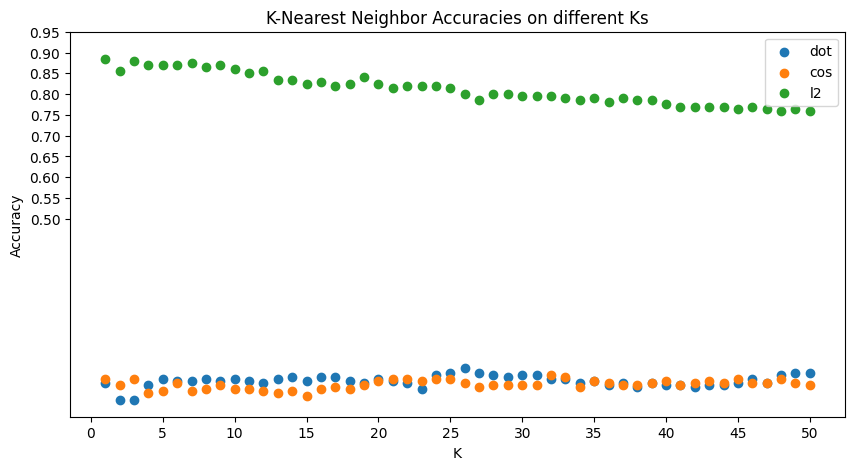

In [59]:
# Visualize the result
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.scatter(x_axis, result[metric], label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()

In [ ]:
###
# Question (d)
# Briefly report what you observe in the plot above.
###

  L2 Distance 메트릭을 사용하였을 때, (타 메트릭 대비) 훨씬 높은 정확도를 보인다.

In [ ]:
###
# Question (e)
# In what kind of dataset dot product(not cosine similarity) will serve as a good metric?
###

고차원의 데이터에서는 오히려 dot product 가 더 좋은 메트릭이 될 수 있다. (Curse of Dimensionality 문제) 또한, dataset 의 magnitude 정보 자체가 유의미할 경우에도 dot product 메트릭을 사용하는 것이 적절하다.